In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии (**1 декабря в 19:00**).  


Вы можете выбирать оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверят ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы и сопроводить выводы релевантной визуализацией. 

Любой хороший аналитик должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите куратору. 

**Вам необходимо разделиться на группы по 2-4 человека и записать состав вашей команды.** Ваше выступление должно длиться примерно 10-15 минут.

## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


In [ ]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

Удалите из данных дупликаты. 

In [ ]:
df = data.drop_duplicates() #Удаление дубликатов
df

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Сколько рейтинговых групп представлено в данных?

In [ ]:
df['rating'].nunique() #Количество уникальных рейтинговых групп

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

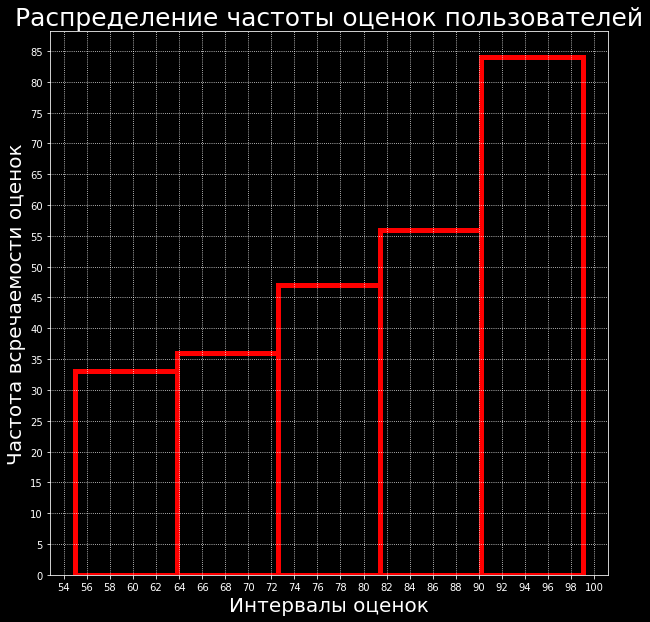

In [ ]:
#Гистограмма для анализа частоты встречаемости оценок пользователей
plt.figure(figsize = (10, 10))
df['user rating score'].hist(color = "black", ec="red", lw= 5, bins = 5)
plt.style.use('dark_background')
plt.grid(True, which='major', color='w', linestyle=':')

plt.title("Распределение частоты оценок пользователей", size = 25)
plt.xlabel("Интервалы оценок", size = 20)
plt.ylabel("Частота всречаемости оценок", size = 20)
plt.locator_params (axis='x', nbins= 45)
plt.locator_params (axis='y', nbins= 24 )

#plt.savefig('hist_rating_score.png', dpi = 50) #для сохранения гистограммы
plt.show()


In [ ]:
count_score = df.groupby('user rating score', as_index = False).count().loc[:,['user rating score','title']].rename(columns = {'title':'count_score'})
count_score

,user rating score,count_score
0,55.0,2
1,56.0,5
2,57.0,6
3,58.0,4
4,59.0,1
5,61.0,7
6,62.0,4
7,63.0,4
8,64.0,5
9,65.0,2


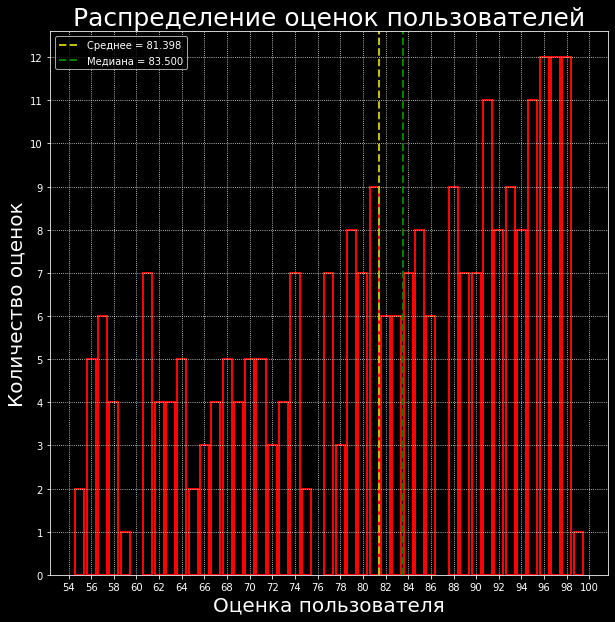

In [ ]:
#Столбчатая диаграмма для анализа количества различных оценок пользователей
plt.figure(figsize = (10, 10))
plt.bar(x = df['user rating score'].value_counts().sort_index().index, height = df['user rating score'].value_counts().sort_index(), color = "black", ec="red", lw= 2)
plt.style.use('dark_background')
plt.grid(True, which='major', color='w', linestyle=':')

plt.title("Распределение оценок пользователей", size = 25)
plt.xlabel("Оценка пользователя", size = 20)
plt.ylabel("Количество оценок", size = 20)

plt.axvline(df['user rating score'].mean(), linewidth=2, color='y', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(df['user rating score'].mean())) #отображение среднего значения
plt.axvline(df['user rating score'].median(), linewidth=2, color='g', alpha=1, linestyle='--', label = 'Медиана = {:.3f}'.format(df['user rating score'].median())) #отображение медианы
plt.locator_params (axis='x', nbins= 40)
plt.locator_params (axis='y', nbins= 20 )

plt.legend()

#plt.savefig('count__rating_score.png', dpi = 50)
plt.show()


In [ ]:
df['user rating score'].isnull().sum() #количество фильмов без оценок

244

In [ ]:
df['user rating score'].count() #количество фильмов с оценкой

256

In [ ]:
#средние оценки пользователей по годам
mean_score = df.groupby('release year').mean().rename(columns = {'user rating score':'mean rating score'}).round(2)
mean_score

,mean rating score
release year,
1940,61.00
1976,NaN
1978,86.00
1982,68.00
1986,67.00
1987,58.00
1989,80.00
1990,65.00
1991,NaN


In [ ]:
#медианное значение оценки пользователей по годам
median_score = df.groupby('release year').median().rename(columns = {'user rating score':'median rating score'}).round(2)
median_score

,median rating score
release year,
1940,61.0
1976,NaN
1978,86.0
1982,68.0
1986,67.0
1987,58.0
1989,80.0
1990,65.0
1991,NaN


In [ ]:
#max значение оценки пользователей по годам
max_score = df.groupby('release year').max().rename(columns = {'user rating score':'max rating score'}).round(2).loc[:,['max rating score']]
max_score

<ipython-input-33-4859fe4097c8>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score = df.groupby('release year').max().rename(columns = {'user rating score':'max rating score'}).round(2).loc[:,['max rating score']]


,max rating score
release year,
1940,61.0
1976,NaN
1978,86.0
1982,68.0
1986,67.0
1987,58.0
1989,80.0
1990,65.0
1991,NaN


In [ ]:
#max значение оценки пользователей по годам
min_score = df.groupby('release year').min().rename(columns = {'user rating score':'min rating score'}).round(2).loc[:,['min rating score']]
min_score

<ipython-input-16-4dad53d6fd7b>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_score = df.groupby('release year').min().rename(columns = {'user rating score':'min rating score'}).round(2).loc[:,['min rating score']]


,min rating score
release year,
1940,61.0
1976,NaN
1978,86.0
1982,68.0
1986,67.0
1987,58.0
1989,80.0
1990,65.0
1991,NaN


In [ ]:
#стандартное отклонение значений оценок пользователей по годам
std_score = df.groupby('release year').std().rename(columns = {'user rating score':'std rating score'}).round(2).loc[:,['std rating score']]
std_score

,std rating score
release year,
1940,NaN
1976,NaN
1978,NaN
1982,NaN
1986,NaN
1987,NaN
1989,NaN
1990,NaN
1991,NaN


In [ ]:
#количество фильмов с оценками по годам
count_year_score = df.groupby('release year').count().rename(columns = {'user rating score':'count_year_score'}).round(2).loc[:,['count_year_score']]
count_year_score

,count_year_score
release year,
1940,1
1976,0
1978,1
1982,1
1986,1
1987,1
1989,1
1990,1
1991,0


In [ ]:
#Таблица со средними, медианными, max, min значениями и количеством оценок пользователей по годам
df_score = pd.concat([count_year_score, mean_score, median_score, max_score, min_score, std_score], axis=1)
df_score

,count_year_score,mean rating score,median rating score,max rating score,min rating score,std rating score
release year,,,,,,
1940,1,61.00,61.0,61.0,61.0,NaN
1976,0,NaN,NaN,NaN,NaN,NaN
1978,1,86.00,86.0,86.0,86.0,NaN
1982,1,68.00,68.0,68.0,68.0,NaN
1986,1,67.00,67.0,67.0,67.0,NaN
1987,1,58.00,58.0,58.0,58.0,NaN
1989,1,80.00,80.0,80.0,80.0,NaN
1990,1,65.00,65.0,65.0,65.0,NaN
1991,0,NaN,NaN,NaN,NaN,NaN


***Вывод:*** 


1.   Из гистограммы видно, что большинство из оценённых фильмов имеют положительные оценки. Больше всего оценок в диапазоне от 90 до 100 баллов.
2.   Можно говорить, что на Netflix показывают фильмы и сериалы с высоким рейтингом, оценок ниже 50 баллов нет.
3. Отсутствуют оценки 60, 76, 87, возможно стоит обратить на это внимание и выяснить причину. 
4. Также стоит отметить, что из 500 фильмов и сериалов оценку имеют только 256. Чтобы первые два вывода не оказались ошибочными, стоит провести анализ, по какой причине так много фильмов не имеют оценку.
5. За 2017 г. мы имеем данные только на 11.06.2017, это тоже надо учитывать, т.к. данные за неполный год не совсем корректно сравнивать с данными, которые предоставлены за полный год.



Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
df['user rating score'].describe() #Основная информация об оценках.

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

***Ответ:*** 


1.   Медиана равна 83,500. Среднее равно 81,398.
2.   Медиана и среднее могут значительно отличаться если в выборке имеются большие выбросы, которые будут оказывать существенное влияние на среднее значение.



В какие годы были запущены шоу, представленные в датасете?

In [ ]:
years_release = np.sort(df['release year'].unique())
years_release
#df['release year'].value_counts() #можно посмотреть количество фильмов по годам

array([1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

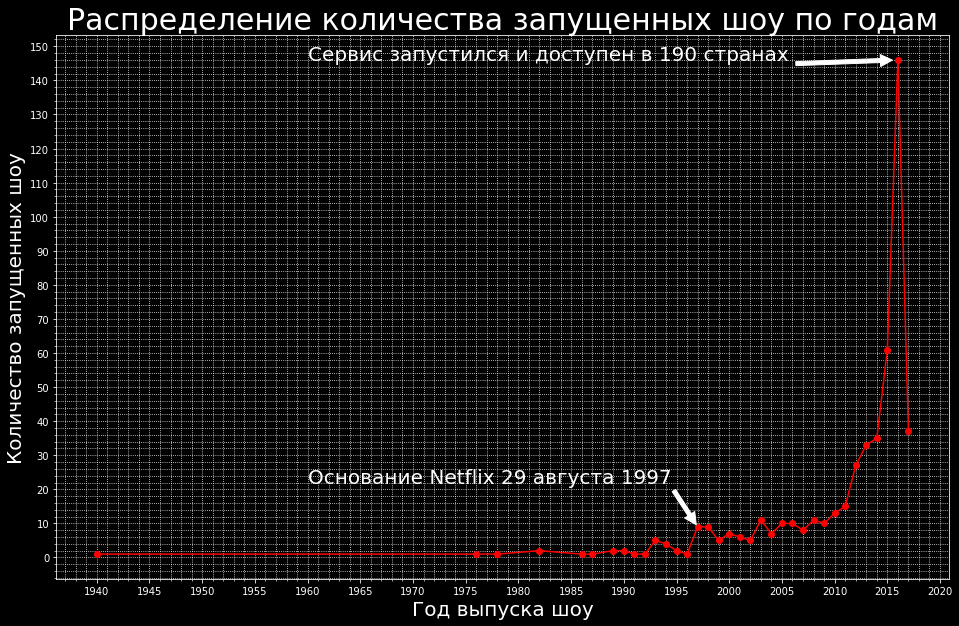

In [ ]:
df.groupby('release year').size().plot(kind = 'line', figsize=(16,10), color = 'red', marker='o', markerfacecolor='red')
plt.style.use('dark_background')

plt.grid(True, which='major', color='w', linestyle=':')
plt.minorticks_on()
plt.grid(which='minor',color = 'w',linestyle = ':')

plt.title("Распределение количества запущенных шоу по годам", size = 30)
plt.xlabel("Год выпуска шоу", size = 20)
plt.ylabel("Количество запущенных шоу", size = 20)
plt.annotate("Основание Netflix 29 августа 1997", xy=(1997, 9), xytext=(1960, 22),arrowprops=dict(facecolor='w', shrink=0.05), size=20)
plt.annotate("Сервис запустился и доступен в 190 странах", xy=(2016, 146), xytext=(1960, 146),arrowprops=dict(facecolor='w', shrink=0.05), size=20)
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)

#plt.savefig('count.png', dpi = 50)
plt.show()

По графику видна тенденция роста количества фильмов и сериалов на Netflix. Также заметен сильный скачок в 2016 г.


Теперь посмотрим на выброс.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


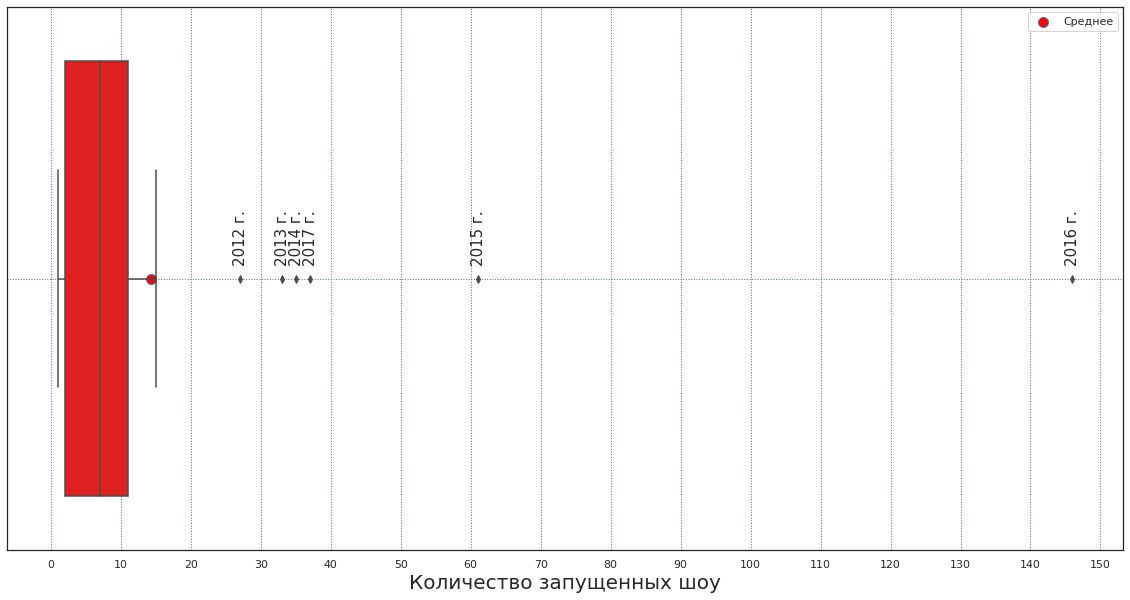

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_theme(style="white")
sns.boxplot(df['release year'].value_counts(), color = 'red')


#plt.style.use('dark_background')
plt.grid(True, which='major', color='b', linestyle=':')
#plt.xticks(df['release year'].value_counts(), rotation=90, size = 15)
plt.scatter(df['release year'].value_counts().mean(), 0, marker='o', s=100, color = 'red', edgecolors = 'b', label = 'Среднее')
plt.xlabel("Количество запущенных шоу", size = 20)

plt.text(26, -0.03, '2012 г.',rotation=90, size = 15)
plt.text(32, -0.03, '2013 г.',rotation=90, size = 15)
plt.text(34, -0.03, '2014 г.',rotation=90, size = 15)
plt.text(36, -0.03, '2017 г.',rotation=90, size = 15)
plt.text(60, -0.03, '2015 г.',rotation=90, size = 15)
plt.text(145, -0.03, '2016 г.',rotation=90, size = 15)
plt.locator_params(axis='x', nbins= 20 )

plt.legend()
#plt.savefig('boxplot.png', dpi = 100)
plt.show()

In [ ]:
df_2 = df['release year'].value_counts().sort_index()
df_2

1940      1
1976      1
1978      1
1982      2
1986      1
1987      1
1989      2
1990      2
1991      1
1992      1
1993      5
1994      4
1995      2
1996      1
1997      9
1998      9
1999      5
2000      7
2001      6
2002      5
2003     11
2004      7
2005     10
2006     10
2007      8
2008     11
2009     10
2010     13
2011     15
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
Name: release year, dtype: int64

***Вывод:*** 


Выборка состоит из наблюдений начиная с 1940 г. и заканчивая 2017 г. Однако основной рост количества сериалов и фильмов начинается с 2010 года.

Факторы влияющие на это:

*   В 2008 году Netflix заключает договор со студией Starz Entertaiment, которая предоставила Netflix более 2000 фильмов и телешоу.
*   К 2010 году компания достигла соглашения с такими крупнейшими киностудиями, как Paramount Pictures, Metro-Goldwyn-Mayer, Lionsgate, Disney, MGM, GBS и многими другими.
*   В 2010 году постепенно начинатеся международная интеграция.Целями сервиса стали страны Западной Европы и Латинская Америка.
*   С 2013 года Netflix производит собственные фильмы и сериалы, в том числе и анимационные, а также телепрограммы.
*   6 января 2016 года, во время пресс-релиза на мировой выставке электроники CES, Рид Хастингс неожиданно объявил, что сервис запустился и доступен для регистрации пользователей в 190 странах мира, среди которых такие большие аудитории, как Россия, Индия и Южная Корея.

Выход на глобальный международный рынок способствуюет увеличению количество пользователей сервиса и как следсвие необходимости большего количества контента. В 2016 году компания выпусткает 126 оригинальных сериалов и фильмов — больше, чем любой другой сетевой или кабельный канал


Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
df.pivot_table(['user rating score'], ['release year'], aggfunc='mean').loc[2016:2017]

,user rating score
release year,
2016,84.313953
2017,88.125000


***Вывод:*** 

В 2016 г. средняя оценка пользователя составила 84,31. 
В 2017 г. средняя оценка ползователя по состоянию на 11.06.2017 составила 88,13. 
Можно сказать, что 2017 г. успешнее, если тенденция средних положительных оценок сохранится до конца года.  

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
df['rating'].value_counts()

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

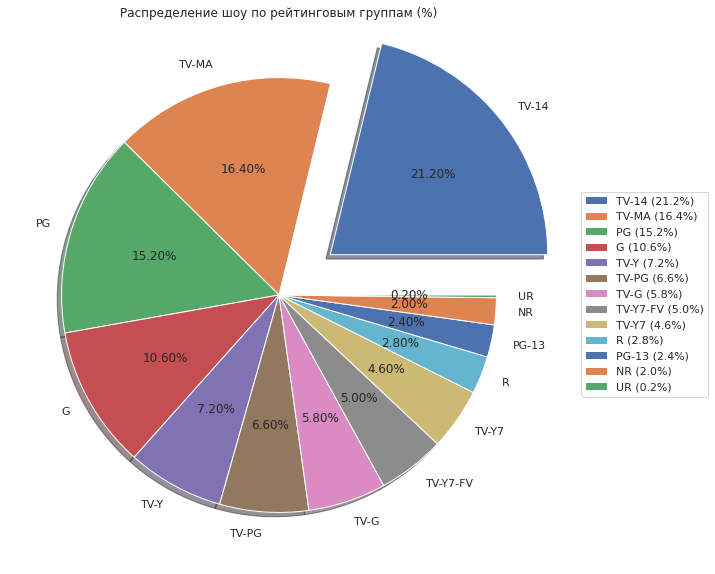

In [ ]:
from numpy.lib.arraysetops import unique
fig = plt.figure(figsize=(15, 10))
#plt.style.use('dark_background')
vals = df['rating'].value_counts()
labels = [f"{n} ({v/sum(df['rating'].value_counts()):.1%})" for n,v in zip(df['rating'].value_counts().index, vals)]
plt.pie(vals, labels=df['rating'].value_counts().index, autopct=lambda p:f'{p:.2f}%', explode = (0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow=True) #wedgeprops=dict(width=0.5) еще вариант диаграммы

plt.title('Распределение шоу по рейтинговым группам (%)')
plt.legend(
    bbox_to_anchor = (0.30, 0.10, 1, 0.6),
    loc = 'best', labels = labels )
#plt.savefig('reiting.png', dpi = 100)
plt.show()

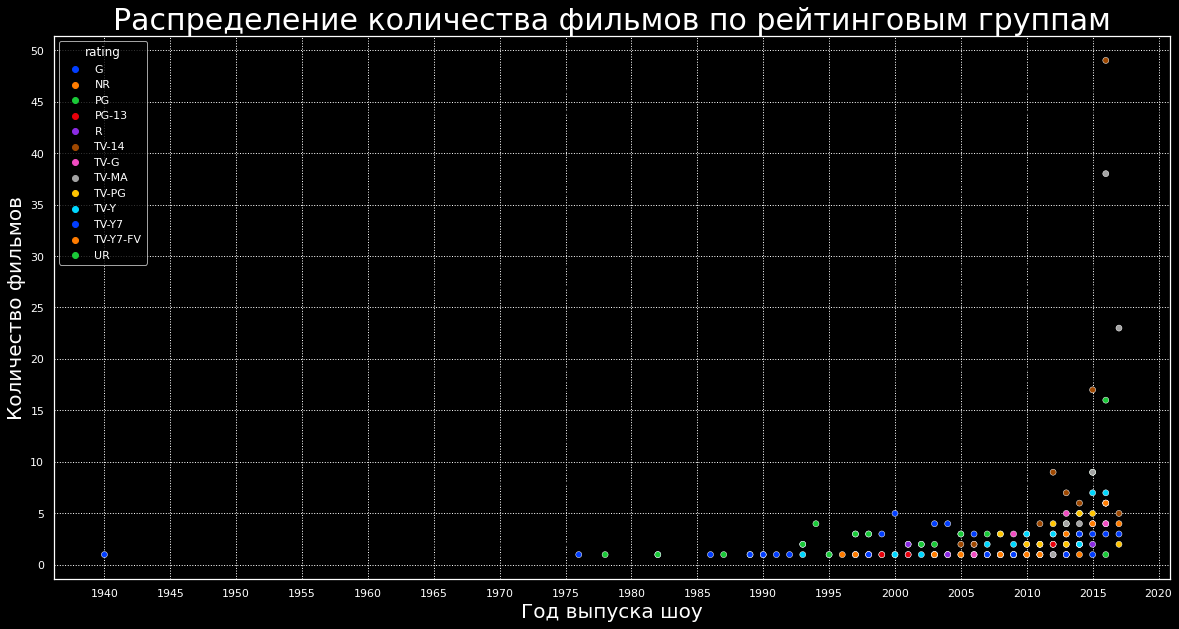

In [ ]:
reitingtv_all = df.groupby(['rating', 'release year'], as_index=False).agg('title').count()
#Распределение количества фильмов по рейтинговым группам в годах

fig = plt.figure(figsize=(20, 10))
plt.style.use('dark_background')

plt.grid(True, which='major', color='white', linestyle=':')
plt.minorticks_on()
plt.grid(which='minor',color = 'black',linestyle = ':')

sns.scatterplot(
    x='release year',
    y='title', 
    data=reitingtv_all,
    palette='bright',
    hue='rating');

plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)
plt.title("Распределение количества фильмов по рейтинговым группам", size = 30)
plt.xlabel("Год выпуска шоу", size = 20)
plt.ylabel("Количество фильмов", size = 20)
#plt.savefig('reiting_film_year.png', dpi = 100)
plt.show()

***Вывод:*** ...

1. В данных представлено 13 рейтинговых групп.
2. Можно выделить три основные рейтинговые группы TV-14, TV-MA, PG, доли которых вместе составляют более 50% от всех рейтинговых групп.
3. Есть одинаковые по возрастному ограничению группы PG и TV-PG, G и TV-G. 
4. Если объединить группы по возрастному ограничению, то получим PG group - 21,8%, TV-14 - 21,2 %, TV-MA - 16,4%. Можно сказать, что большая часть шоу рассчитана на аудиторию с небольшими возрастными ограничениями.   
5. Также можно отметить увеличение в последние годы фильмов в рейтинговых группах TV-14, TV-MA.

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
#Выбираем фильмы/сериалы
df_film = df[(df['title'] == 'Anastasia') | (df['title'] == 'Breaking Bad') | (df['title'] == 'Orange Is the New Black')]
df_film

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
703,Anastasia,G,General Audiences. Suitable for all ages.,1997,93.0


In [ ]:
#Выбираем информацию по оценкам за года в которых были запущены фильмы/сериалы
df_info_score = df_score[(df_score.index == 1997) | (df_score.index == 2013) | (df_score.index == 2016)]
df_info_score

,count_year_score,mean rating score,median rating score,max rating score,min rating score,std rating score
release year,,,,,,
1997,5,80.80,81.0,93.0,72.0,8.14
2013,11,76.91,81.0,97.0,57.0,14.72
2016,86,84.31,89.0,98.0,56.0,12.60


In [ ]:
#Объединяем информацию для анализа
from operator import index
info_films = df_film.merge(df_info_score, left_on ='release year', right_on=df_info_score.index, how='inner').sort_values(['release year'], ascending = True)
info_films

,title,rating,ratingLevel,release year,user rating score,count_year_score,mean rating score,median rating score,max rating score,min rating score,std rating score
2,Anastasia,G,General Audiences. Suitable for all ages.,1997,93.0,5,80.80,81.0,93.0,72.0,8.14
0,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0,11,76.91,81.0,97.0,57.0,14.72
1,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0,86,84.31,89.0,98.0,56.0,12.60


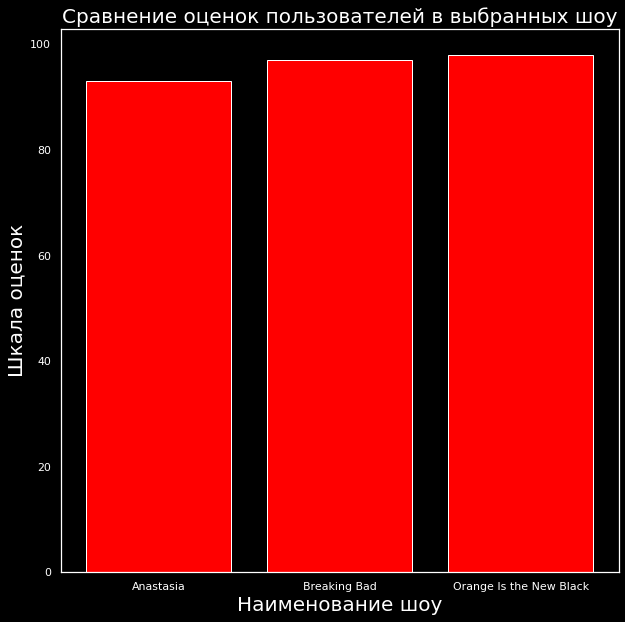

In [ ]:
plt.figure(figsize=(10, 10))
plt.bar(x = 'title', height= 'user rating score', data = info_films, color = 'red')
plt.title("Сравнение оценок пользователей в выбранных шоу", size = 20)
plt.xlabel("Наименование шоу", size = 20)
plt.ylabel("Шкала оценок", size = 20)
plt.show()

***Вывод:***
1. Для описательного портрета были взяты фильмы/сериалы с максимальным рейтингом:
*   за 1997 г. (год основания Netflix)
*   за 2013 г. (год начала производства собственных фильмов Netflix)
*   за 2016 г. (выход на глобальный рынок, регистрация в 190 странах мира)
2. Из выборки видно, что по мере развития Netflix с каждым годом оценка пользователей становится выше. Если в 1997 и 2013 годах фильмов/сериалов с максимальной оценкой всего по одному, то в 2016 г. уже 6. Это можно связать с увеличением контента и анализом предпочтений пользователей.
3. Сравнивая фильмы/сериалы по рейтингу ТВ, можно сказать, что фильмы с максимальными оценками за 2013 и 2016 года входят в рейтинг TV-MA, программ предназначенных для взрослых, в отличии от фильма 1997 г., который подходит для любой аудитории (рейтинг G).
4. Если изучить дополнительную информацию, то можно отметить, что:
*   Все фильмы с максимальными оценками пользователей произведены в США
*   Сериал "Orange Is the New Black" является собственным производством Netflix и входит в топ фильмов/сериалов с максимальной оценкой 98 за 2016 г., это может говорить о том, что Netflix занимает одну из лидирующих позиций в своей индустрии.	
